<a href="https://colab.research.google.com/github/puweiliao/Machine-learning/blob/main/asset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 

drive.mount('/content/gdrive/') 

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
path="/content/gdrive/MyDrive/datacamp/asset1.csv"
asset1 = pd.read_csv(path)
asset1

,Unnamed: 0,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,0,1.0,229.0,13835.194000,14013.800000,13666.11,13850.176000,31.550062,13827.062093,-0.014643
1,1,1.0,235.0,13835.036000,14052.300000,13680.00,13828.102000,31.046432,13840.362591,-0.015037
2,2,1.0,528.0,13823.900000,14000.400000,13601.00,13801.314000,55.061820,13806.068014,-0.010309
3,3,1.0,435.0,13802.512000,13999.000000,13576.28,13768.040000,38.780529,13783.598101,-0.008999
4,4,1.0,742.0,13766.000000,13955.900000,13554.44,13724.914000,108.501637,13735.586842,-0.008079
...,...,...,...,...,...,...,...,...,...,...
1956955,1956955,1.0,1940.0,42983.780000,43001.850849,42878.26,42899.012857,56.850913,42935.489499,-0.000002
1956956,1956956,1.0,2026.0,42904.197143,42932.000000,42840.16,42860.005714,80.993326,42879.576084,0.000003
1956957,1956957,1.0,1986.0,42859.385714,42887.500000,42797.20,42827.020000,65.677734,42844.090693,-0.000002
1956958,1956958,1.0,4047.0,42839.012802,43042.160000,42818.10,43017.277143,138.335477,42935.761938,-0.000004


In [ ]:
pip install statsmodels --upgrade

In [ ]:
import numpy as np # linear algebra
from numpy.random import seed 
import math 

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from datetime import datetime, date 

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import seaborn as sns

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

import statsmodels as sm
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA

# Fix seed for reproducible results
SEED = 42
np.random.seed(SEED)

# Visualizations
lag_acf = 1
lag_pacf = 1
height = 4
width = 12

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
# define function to compute log returns
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)


import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime


import time

# auxiliary function, from datetime to timestamp
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

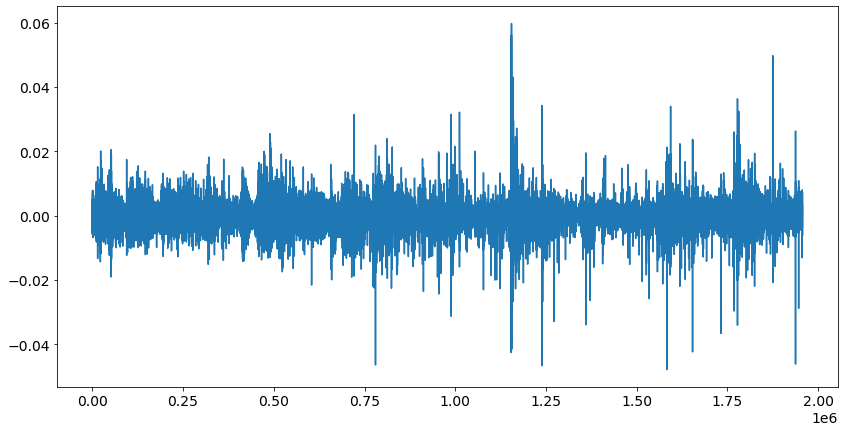

In [ ]:


# create intervals
#asset1_mini_2021 = asset1.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]

log_asset1 = log_return(asset1.Close)

#lret_btc.rename('lret_btc', inplace=True)


plt.figure(figsize=(14,7))
plt.plot(log_asset1);

plt.show()

In [ ]:
log_asset1.isna().sum()
log_asset1.drop([0])
#log_asset1

1         -0.001595
2         -0.001939
3         -0.002414
4         -0.003137
5         -0.000569
             ...   
1956955   -0.002007
1956956   -0.000910
1956957   -0.000770
1956958    0.004433
1956959   -0.000343
Name: Close, Length: 1956959, dtype: float64

In [ ]:
inds = pd.isnull(log_asset1).any(0).nonzero()[0]
inds

array([0])

In [ ]:
log_asset1.isin([np.inf, -np.inf]).sum()

0

In [ ]:
#check_stationarity(log_asset1)
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
log_asset1=log_asset1.drop([0])

In [ ]:
log_asset1.isna().sum()

0

TypeError: ignored

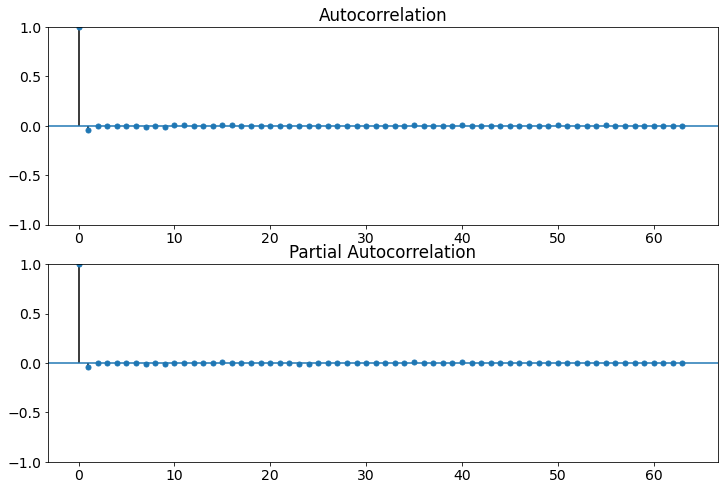

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(width, 2*height))
plot_acf(log_asset1, ax=ax[0])
plot_pacf(log_asset1,ax=ax[1], method='ols')

ax[1].annotate( xy=(1, 0.6),  xycoords='data',
            xytext=(0.17, 0.75), textcoords='axes fraction',
            arrowprops=dict(color='red', shrink=0.05, width=1))

plt.tight_layout()
plt.show()

In [ ]:
#new partiepartie#####
####Modèle AR(1)

In [ ]:
import numpy as np
log_asset1 = log_asset1[~np.isnan(log_asset1)]
log_asset1.isna().sum()

0

In [ ]:
dateasset1=np.arange(1956959)

In [ ]:
sample=pd.DataFrame({'timestamp' : dateasset1,
                       't' : log_asset1})

In [ ]:
num_samples=len(log_asset1)
train_len = int(0.8* num_samples)

train = sample['t'][:train_len]

In [ ]:



ar_model = AutoReg(train, lags=1).fit()

print(ar_model.summary())
pred = ar_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
#ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

In [ ]:
#####
#Modèle  MA(1)

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.tsa.arima_model import ARMA
#arima(p,d,q)

In [ ]:
ma_model = sm.tsa.arima.ARIMA(train, order=(0,0,1)).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [ ]:


print(ma_model.summary())
pred = ma_model.predict(start=train_len, end=num_samples, dynamic=False)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

                               SARIMAX Results                                
Dep. Variable:                      t   No. Observations:              1565567
Model:                 ARIMA(0, 0, 1)   Log Likelihood             8332874.961
Date:                Sun, 03 Apr 2022   AIC                      -16665743.922
Time:                        18:40:19   BIC                      -16665707.131
Sample:                             0   HQIC                     -16665733.976
                            - 1565567                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.392e-07   8.73e-07      0.389      0.697   -1.37e-06    2.05e-06
ma.L1         -0.0754      0.000   -440.976      0.000      -0.076      -0.075
sigma2      1.394e-06    2.9e-10   4804.379      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.d

                               SARIMAX Results                                
Dep. Variable:                      t   No. Observations:              1565567
Model:                 ARIMA(1, 0, 1)   Log Likelihood             8332884.735
Date:                Sun, 03 Apr 2022   AIC                      -16665761.470
Time:                        19:06:31   BIC                      -16665712.415
Sample:                             0   HQIC                     -16665748.208
                            - 1565567                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.392e-07   8.76e-07      0.387      0.699   -1.38e-06    2.06e-06
ar.L1         -0.0412      0.002    -18.536      0.000      -0.046      -0.037
ma.L1         -0.0342      0.002    -15.669      0.0

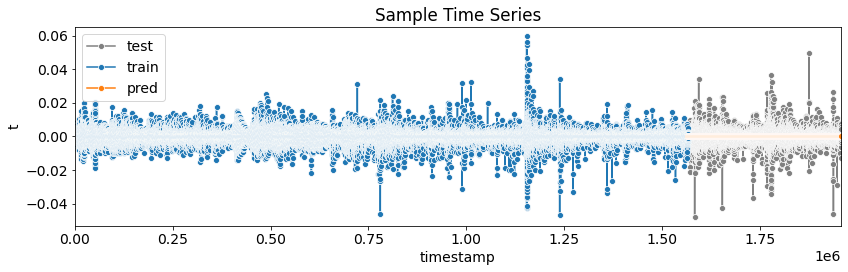

In [ ]:
#ARMA(1,1)



arma_model = sm.tsa.arima.ARIMA(train, order=(1,0,1)).fit()
pred = arma_model.predict(start=train_len, end=num_samples, dynamic=False)
print(arma_model.summary())
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=sample.t[train_len:num_samples], marker='o', label='test', color='grey')
sns.lineplot(x=sample.timestamp[:train_len], y=train, marker='o', label='train')
sns.lineplot(x=sample.timestamp[train_len:num_samples], y=pred, marker='o', label='pred')
ax.set_xlim([sample.timestamp.iloc[0], sample.timestamp.iloc[-1]])
ax.set_title('Sample Time Series')
plt.tight_layout()
plt.show()

LSTM

In [ ]:
# Normaliozation
from sklearn.preprocessing import MinMaxScaler

norm = np.linalg.norm(train)

training_data = train/norm
training_data

1         -0.000166
2         -0.000509
3         -0.000269
4         -0.000941
5         -0.000341
             ...   
1565563    0.000634
1565564   -0.001159
1565565    0.000275
1565566    0.000713
1565567   -0.000869
Name: t, Length: 1565567, dtype: float64

(1565567,)